In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from lc_classifier.features.extractors.ulens_extractor import ulens_model_jax

In [5]:
t = np.linspace(-50, 50, 1000)
mag = ulens_model_jax(t, u0=0.7, tE=20.0, fs=0.9, t0=30, mag_0=17.0)

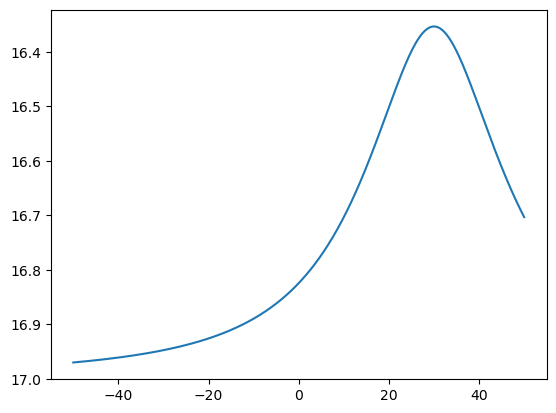

In [6]:
plt.plot(t, mag)
plt.gca().invert_yaxis()